Police fatal shootings in the United States has been a problem for decades, but it was not until 2014 after the shooting of Michael Brown when people started questioning police accountaibility and the racial profiling that accopamnied the shootings. This event also started the #blacklivesmatter movement to fight for social justice and equality. I've gathered data from kaggle.com on fatal police shootings since 2015 to explore the depth of the problem. It's important to note that the data does not account for anything before 2015. According to the description of the dataset on kaggle, "Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, a vast number of cases go unreported." Now let's analyze the kaggle data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

In [15]:
df = pd.read_csv('datasets/PoliceKillingsUS.csv',encoding= 'unicode_escape')


In [16]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [79]:
races = ['white','black','Hispanic']

In [21]:
def get_number_killed_race(race):
    count =0
    for race_type in df['race']:
        if race_type == race:
            count +=1
    return count        

In [24]:
num_w_killed = get_number_killed_race('W')

In [25]:
num_w_killed

1201

In [27]:
num_b_killed = get_number_killed_race('B')

In [28]:
num_b_killed

618

In [32]:
num_h_killed = get_number_killed_race('H')

In [33]:
num_h_killed

423

wikipedia on the percentage of people in USA based on ethnicity from a 2019 U.S census:
non-hispanic whites: 63.4%
hispanic and latino: 15.3%
black: 13.4%
asian: 5.9%



below is the total amount of fatal shots
now let's see the ratio of each race shot

In [40]:
df.index[-1]

2534

In [45]:
percentage_w_poeple_shot = (num_w_killed/2534)*100

In [47]:
percentage_w_poeple_shot

47.39542225730071

In [48]:
percentage_b_poeple_shot = (num_b_killed/2534)*100

In [49]:
percentage_b_poeple_shot

24.388318863456984

In [50]:
percentage_h_poeple_shot = (num_h_killed/2534)*100

In [55]:
percentage_h_poeple_shot

16.692975532754538

In the dataset's manner of death column, we can see both "shot" and "shot and tasered". Now let's see which race(white,african american, and hispanic) the cops have been the most violent with by getting the number of people "shot and tasered " from each of the mentioned races

In [58]:
def get_number_violent_incidents(race):
    index=0
    count =0
    for race_type in df['race']:
        if race_type == race:
             if df['manner_of_death'][index] == 'shot and Tasered':
                count +=1
        index+=1        
    return count        
    

In [73]:
ratio_w_violent = (get_number_violent_incidents('W')/num_w_killed)*100
ratio_b_violent = (get_number_violent_incidents('B')/num_b_killed)*100
ratio_h_violent = (get_number_violent_incidents('H')/num_h_killed)*100

In [74]:
ratio_w_violent

6.49458784346378

In [75]:
ratio_b_violent

6.634304207119741

In [76]:
ratio_h_violent

7.5650118203309695

Now let's visualize our findings with graphs

In [92]:
percentage_shot_array=[percentage_w_poeple_shot,percentage_b_poeple_shot,percentage_h_poeple_shot]
ratio_violent_array = [ratio_w_violent,ratio_b_violent,ratio_h_violent]

In [94]:
df2 = pd.DataFrame({'races':races, 'percentage_shot':percentage_shot_array})
df3 = pd.DataFrame({'races':races, 'ratio_violent':ratio_violent_array})

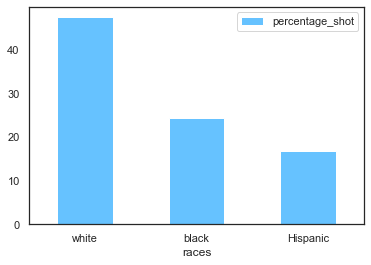

In [95]:
ax = df2.plot.bar(x='races', y='percentage_shot', rot=0)

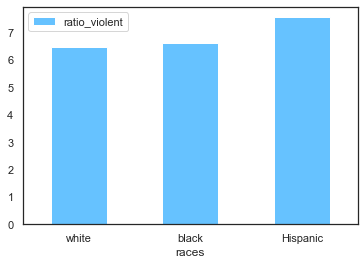

In [96]:
ax2=df3.plot.bar(x='races', y='ratio_violent', rot=0)

In [104]:
demographics_us_pop = pd.DataFrame({'races':races, 'percentage_pop':[63.4,13.4,15.3]},index=races)

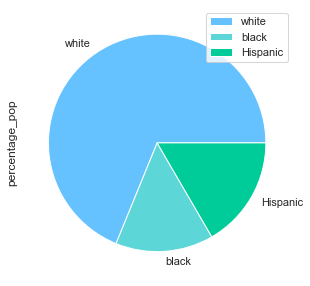

In [105]:
plot = demographics_us_pop.plot.pie(x= 'races',y='percentage_pop', figsize=(5, 5))

Black people make up 13.4% of the US population(visualiztion on the pie chart based on 2019 census data on Wikipedia), yet they account for 24.39%(ABOUT TWICE OF THE RATIO OF THEIR POPULATION IN THE USA) of the fatal shots. Hispanics make up 15.3% of the US population, yet they account for 16.69% of the fatal shots. It's hard to not see the racial profiling when the whites make up 63.4% of the US population and they account for 47.40% of fatal shots. Cops are also more likely to both 'Shot and Tase' hispanics and blacks but the differences are not as significant as the fatal shot ratios.